Task 1: Data Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [ ]:
# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
# Inspect data structure
print(data.shape)
print(data.info())
print(data.isnull().sum())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [ ]:
# Convert categorical features to numerical (using Label Encoding and One-Hot Encoding)
# For binary categorical variables, we can use Label Encoding
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])  # Attrition column is binary

In [ ]:
# For multi-class categorical variables, we use One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears']
# Example numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:

# Inspect final preprocessed data
print(data.head())

        Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350          1   0.742527                 1          2              1   
1  1.322365          0  -1.297775                 8          1              1   
2  0.008343          1   1.414363                 2          2              1   
3 -0.429664          0   1.461466                 3          4              1   
4 -1.086676          0  -0.524295                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   

   JobRole_Laboratory Technician  JobR

In [ ]:
# Split the data into train and test sets
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Task 2: Feature Selection and Engineering

In [ ]:
# Correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

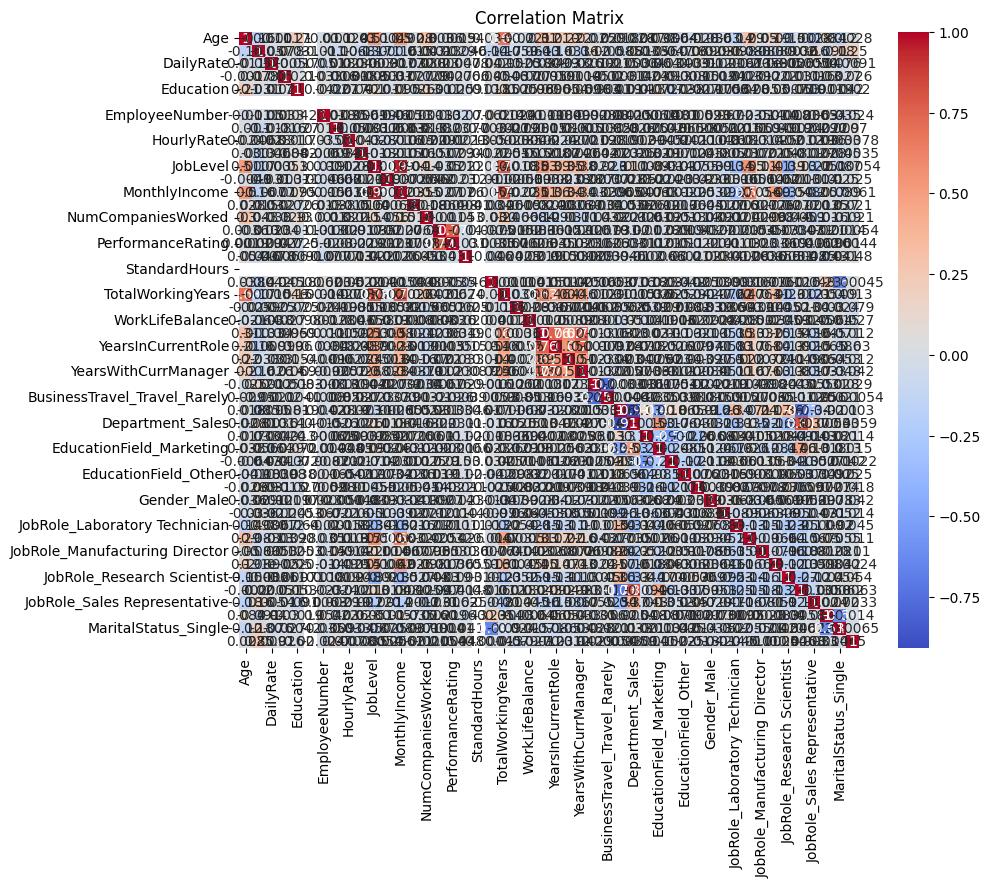

In [ ]:
# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Build a basic RandomForest to check feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Extract feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)


In [ ]:
print(feature_importances.head())


                   Importance
MonthlyIncome        0.081294
Age                  0.057200
OverTime_Yes         0.051431
TotalWorkingYears    0.050934
DailyRate            0.046271


In [ ]:
# Engineer new features if applicable (e.g., tenure in years)
data['Tenure'] = data['YearsAtCompany'] + data['YearsInCurrentRole']  # Example of feature engineering

Task 3: Model Selection and Building

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning with cross-validation
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

In [ ]:
# Neural Network Model
mlp = MLPClassifier(random_state=42, max_iter=500)
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}
grid_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5)
grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50, 50), (100,)]})

In [ ]:
# Check best parameters and performance for both models
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Neural Network Params:", grid_mlp.best_params_)

Best Random Forest Params: {'max_depth': 10, 'n_estimators': 200}
Best Neural Network Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}


Task 4: Model Evaluation and Interpretation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Predictions for Random Forest
rf_predictions = grid_rf.predict(X_test)
mlp_predictions = grid_mlp.predict(X_test)

In [ ]:
# Accuracy, Precision, Recall, F1 Score, AUC
rf_accuracy = accuracy_score(y_test, rf_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

In [ ]:

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
mlp_cm = confusion_matrix(y_test, mlp_predictions)

In [ ]:
# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, grid_rf.predict_proba(X_test)[:, 1])
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, grid_mlp.predict_proba(X_test)[:, 1])

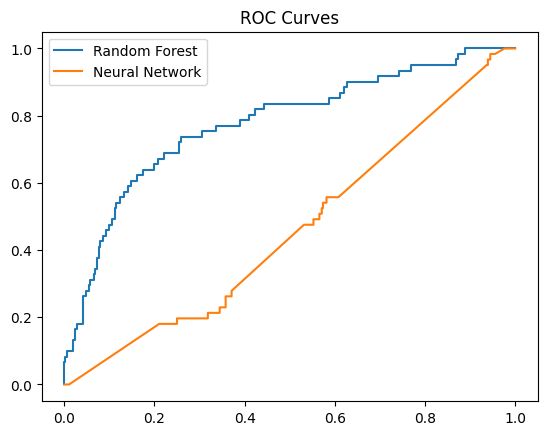

In [ ]:
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(mlp_fpr, mlp_tpr, label='Neural Network')
plt.title('ROC Curves')
plt.legend()
plt.show()

Task 5: Model Comparison

In [ ]:
# Print accuracy and other metrics for comparison
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Neural Network Accuracy: {mlp_accuracy}")

Random Forest Accuracy: 0.8707482993197279
Neural Network Accuracy: 0.8616780045351474
